In [3]:
P = matrix([
    [0, -1/2, 0, 0],
    [-1/2, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

In [4]:
P.inverse()

[ 0 -2  0  0]
[-2  0  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

In [5]:
W = matrix([
    [2, 0, 0, 1],
    [2, 0, 0, -1],
    [-1, 1, 0, 0],
    [3, 1, sqrt(2), 0]
])

In [6]:
m = W * P * W.transpose()
m

[ 1 -1 -1 -1]
[-1  1 -1 -1]
[-1 -1  1 -1]
[-1 -1 -1 -1]

In [7]:
m.determinant()

-8

In [8]:
m.inverse()

[ 1/2    0    0 -1/2]
[   0  1/2    0 -1/2]
[   0    0  1/2 -1/2]
[-1/2 -1/2 -1/2  1/2]

In [9]:
bt1 = var('bt1')
b1  = var('b1')
h11 = var('h11')
h12 = var('h12')
bt2 = var('bt2')
b2  = var('b2')
h21 = var('h21')
h22 = var('h22')
bt3 = var('bt3')
b3  = var('b3')
h31 = var('h31')
h32 = var('h32')
bt4 = var('bt4')
b4  = var('b4')
h41 = var('h41')
h42 = var('h42')


W2 = matrix([
    [bt1, b1, h11, h12],
    [bt2, b2, h21, h22],
    [bt3, b3, h31, h32],
    [bt4, b4, h41, h42],
])

In [10]:
D = W2.transpose() * m.inverse() * W2

In [11]:
P.inverse()

[ 0 -2  0  0]
[-2  0  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

In [12]:
quad = 2 * factor(simplify(D[1][1]))
solve(quad == 0, b4)

[b4 == b1 + b2 + b3 - sqrt(2*b1*b2 + 2*(b1 + b2)*b3), b4 == b1 + b2 + b3 + sqrt(2*b1*b2 + 2*(b1 + b2)*b3)]

In [13]:
quad

b1^2 + b2^2 + b3^2 - 2*b1*b4 - 2*b2*b4 - 2*b3*b4 + b4^2

In [14]:
factor(simplify(D[2][1]))

1/2*b1*h11 - 1/2*b4*h11 + 1/2*b2*h21 - 1/2*b4*h21 + 1/2*b3*h31 - 1/2*b4*h31 - 1/2*b1*h41 - 1/2*b2*h41 - 1/2*b3*h41 + 1/2*b4*h41

In [20]:
def circle_from_points(pta, ptb, ptc):
    a = var('a')
    b = var('b')
    r = var('r')
    x = var('x')
    y = var('y')
    
    circle_func = (x - a)^2 + (y - b)^2 == r^2
    
    eq1 = circle_func.subs(x == pta[0]).subs(y == pta[1])
    eq2 = circle_func.subs(x == ptb[0]).subs(y == ptb[1])
    eq3 = circle_func.subs(x == ptc[0]).subs(y == ptc[1])
    
    res = solve([eq1, eq2, eq3], a, b, r)[1]
    
    return (res[0].rhs(), res[1].rhs(), res[2].rhs())

In [21]:
circle_from_points((0, 1), (1, 0), (1, 1))

(1/2, 1/2, 1/2*sqrt(2))

sqrt(2)
2*sqrt(2)


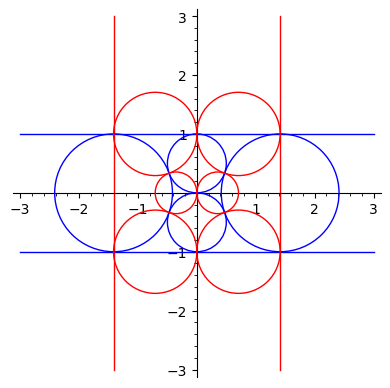

In [23]:
c1 = line([(-3, 1), (3, 1)])
c2 = line([(-3, -1), (3, -1)])
c3 = circle((-sqrt(2), 0), 1)
c4 = circle((sqrt(2), 0), 1)
c5 = circle((0, 1/2), 1/2)
c6 = circle((0, -1/2), 1/2)

b1 = line([(-sqrt(2), -3), (-sqrt(2), 3)], rgbcolor=(1, 0, 0))
b2 = line([(sqrt(2), -3), (sqrt(2), 3)], rgbcolor=(1, 0, 0))

x, y, r = circle_from_points((sqrt(2) / 3, 1 / 3), (0, 1), (sqrt(2), 1))
print(1 / r)

b3 = circle(( x,  y), r, rgbcolor=(1, 0, 0))
b4 = circle((-x,  y), r, rgbcolor=(1, 0, 0))
b5 = circle(( x, -y), r, rgbcolor=(1, 0, 0))
b6 = circle((-x, -y), r, rgbcolor=(1, 0, 0))

x, y, r = circle_from_points((sqrt(2) / 3, 1 / 3), (0, 0), (sqrt(2) / 3, -1 / 3))
print(1 / r)

b7 = circle(( x, y), r, rgbcolor=(1, 0, 0))
b8 = circle((-x, y), r, rgbcolor=(1, 0, 0))

show(c1 + c2 + c3 + c4 + c5 + c6 + b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8)